In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


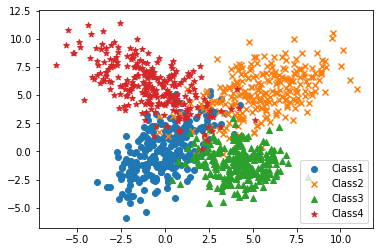

In [82]:

loaddata_train1=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class1_train.txt')
loaddata_train2=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class2_train.txt')
loaddata_train3=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class3_train.txt')
loaddata_train4=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class4_train.txt')
loaddata_test1=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class1_test.txt')
loaddata_test2=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class2_test.txt')
loaddata_test3=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class3_test.txt')
loaddata_test4=np.loadtxt('E:/24510013/ML/synthetic_data/overlapping_data/group5/class4_test.txt')

plt.scatter(loaddata_train1[:,0], loaddata_train1[:,1], marker='o', label='Class1')
plt.scatter(loaddata_train2[:,0], loaddata_train2[:,1], marker='x', label='Class2')
plt.scatter(loaddata_train3[:,0], loaddata_train3[:,1], marker='^', label='Class3')
plt.scatter(loaddata_train4[:,0], loaddata_train4[:,1], marker='*', label='Class4')
plt.legend()
plt.show()

In [20]:
from math import sqrt
def euc_dist(x1,x2):
    a=np.delete(x1,-1,axis=1)
    b=np.delete(x2,-1,axis=1)
    q=(a-b)**2
    d=np.sum(q,axis=1)
    return np.sqrt(d)

In [47]:
def get_neb(dataset,test_row,k):
   
    nbr=list()
    dt=euc_dist(dataset,test_row).reshape(dataset.shape[0],1)
    
    neighbors=np.append(dataset,dt,axis=1)
    
    neighbors = neighbors[np.argsort(neighbors[:, 3])]
    for i in range(k):
        nbr.append(neighbors[i])
    return nbr

In [52]:
def predict_class(dataset,test_row,k):
    neighbors = get_neb(dataset, test_row,k)
    c_values = [row[-2] for row in neighbors]
    prediction = max(set(c_values), key=c_values.count)
    return prediction

In [83]:
l1=np.ones((loaddata_train1.shape[0], 1))
l2=np.ones((loaddata_train2.shape[0], 1))*2
l3=np.ones((loaddata_train3.shape[0], 1))*3
l4=np.ones((loaddata_train4.shape[0], 1))*4
train1=np.append(loaddata_train1,l1,axis=1)
train2=np.append(loaddata_train2,l2,axis=1)
train3=np.append(loaddata_train3,l3,axis=1)
train4=np.append(loaddata_train4,l4,axis=1)
dataset=np.concatenate((train1,train2,train3,train4))

In [84]:
l1=np.ones((loaddata_test1.shape[0], 1))
l2=np.ones((loaddata_test2.shape[0], 1))*2
l3=np.ones((loaddata_test3.shape[0], 1))*3
l4=np.ones((loaddata_test4.shape[0], 1))*4
train1=np.append(loaddata_test1,l1,axis=1)
train2=np.append(loaddata_test2,l2,axis=1)
train3=np.append(loaddata_test3,l3,axis=1)
train4=np.append(loaddata_test4,l4,axis=1)
test_data=np.concatenate((train1,train2,train3,train4))

In [85]:
a=list()
for i in test_data:
    c=predict_class(dataset,i.reshape(1,3),13)
    a.append(c)
y_hat=np.array(a).reshape(test_data.shape[0],1)

In [86]:

y=test_data[:,-1].reshape(test_data.shape[0],1)


In [87]:
l11 = 0
l12 = 0
l13=0
l14=0
l21 = 0
l22 = 0
l23=0
l24=0
l31=0
l32=0
l33=0
l34=0
l41=0
l42=0
l43=0
l44=0

for i in range(len(y)):
    if int(y_hat[i])==1 and int(y[i])==1:
        l11+=1
    elif y_hat[i]==1 and int(y[i])==2:
        l12+=1
    elif int(y_hat[i])==1 and int(y[i])==3:
        l13+=1
    elif int(y_hat[i])==1 and int(y[i])==4:
        l14+=1
    elif int(y_hat[i])==2 and int(y[i])==1:
        l21+=1
    elif int(y_hat[i])==2 and int(y[i])==2:
        l22+=1
    elif int(y_hat[i])==2 and int(y[i])==3:
        l23+=1
    elif int(y_hat[i])==2 and int(y[i])==4:
        l24+=1
    elif int(y_hat[i])==3 and int(y[i])==1:
        l31+=1
    elif int(y_hat[i])==3 and int(y[i])==2:
        l32+=1
    elif int(y_hat[i])==3 and int(y[i])==3:
        l33+=1
    elif int(y_hat[i])==3 and int(y[i])==4:
        l34+=1
    elif int(y_hat[i])==4 and int(y[i])==4:
        l44+=1
    elif int(y_hat[i])==4 and int(y[i])==3:
        l43+=1
    elif int(y_hat[i])==4 and int(y[i])==2:
        l42+=1
    elif int(y_hat[i])==4 and int(y[i])==1:
        l41+=1
        
a = np.array([[l11, l12,l13,l14],[l21, l22,l23,l24],[l31, l32,l33,l34],[l41, l42,l43,l44]])
print('Confusion Matrix: ')	
print(a)

    
acc = (l11+l22+l33+l44)*100/400
print('Accuracy: ' + repr(acc))


Confusion Matrix: 
[[93  3  6  8]
 [ 2 91  2  3]
 [ 4  2 92  1]
 [ 1  4  0 88]]
Accuracy: 91.0


In [93]:
p=np.arange(dataset[:,0].min()-1,dataset[:,0].max()+1,0.1)
q=np.arange(dataset[:,1].min()-1,dataset[:,1].max()+1,0.1)
xx,yy=np.meshgrid(p,q)
d=np.array([xx.ravel(),yy.ravel()]).T
ab=np.random.randn(d.shape[0],1)
d=np.append(d,ab,axis=1)
d[1].shape

(3,)

In [95]:
label=[]
for i in d:
    lb=predict_class(dataset,i.reshape(1,3),17)
    label.append(lb)

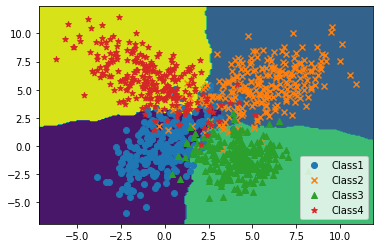

In [96]:
lab=np.array(label)
plt.contourf(xx,yy,lab.reshape(xx.shape))
plt.scatter(loaddata_train1[:,0], loaddata_train1[:,1], marker='o', label='Class1')
plt.scatter(loaddata_train2[:,0], loaddata_train2[:,1], marker='x', label='Class2')
plt.scatter(loaddata_train3[:,0], loaddata_train3[:,1], marker='^', label='Class3')
plt.scatter(loaddata_train4[:,0], loaddata_train4[:,1], marker='*', label='Class4')
plt.legend()
plt.show()